# Лабораторна робота №3
## Студента групи МІТ-31 (підгрупа 2)
## Маніла Дмитра Олексійовича

# Завдання
1.  Створити набір даних за допомогою DatasetGenerator

2.  Завантажити набір даних для класифікації на сайті (у кожного студента має бути інший - прошу організуватись відповідним чином)

3.  (опціонально для отримання відмінної оцінки) Згенерувати набір даних для класифікації на основі звичайних можливостей Python.

4.  Для отриманих наборів даних провести встановленні кроки моделювання.

5.  Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab3.

In [21]:
import numpy as np
import matplotlib as plt
import sklearn.model_selection
import sklearn.datasets
import pandas as pd
import seaborn as sns

In [22]:
X, y = sklearn.datasets.make_classification(n_samples=1024, n_features=20, class_sep=0.98, random_state=0)
model1 = (sklearn.model_selection.train_test_split(X, y, test_size=0.5, random_state=0),)

model2 = pd.read_csv(".\citrus.csv")
df = model2
data = df

In [23]:
df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [24]:
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


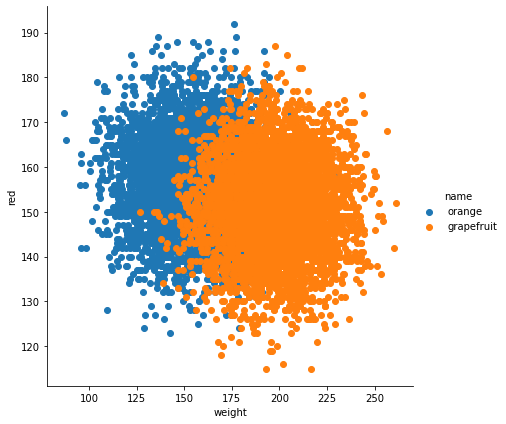

In [30]:
sns.FacetGrid(df, hue="name", size=6) \
   .map(plt.pyplot.scatter, "weight", "red") \
   .add_legend()

plt.pyplot.show()

In [57]:
# step 1
features = list(data.columns[0:6])          
target = data.columns[1]                      

print('Features:',features)
print('Target:',target)

# store feature matrix in "X"
X = data.iloc[:,1:6]

# store response vector in "y"
y = data.iloc[:,6]


print(y.shape)
print(X.shape)

Features: ['name', 'diameter', 'weight', 'red', 'green', 'blue']
Target: diameter
(10000,)
(10000, 5)


In [58]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y=le.transform(y)

# new col
data['EncodedType'] = y

print('Classes:',le.classes_)
print('Response variable after encoding:',y)
data.tail(10)

Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]
Response variable after encoding: [50 43 46 ... 47 37 39]


,name,diameter,weight,red,green,blue,EncodedType
9990,grapefruit,14.91,250.68,158,73,15,38
9991,grapefruit,14.93,251.41,138,75,20,40
9992,grapefruit,14.95,251.82,149,84,6,49
9993,grapefruit,14.96,252.28,152,58,9,23
9994,grapefruit,15.16,253.64,136,76,20,41
9995,grapefruit,15.35,253.89,149,77,20,42
9996,grapefruit,15.41,254.67,148,68,7,33
9997,grapefruit,15.59,256.50,168,82,20,47
9998,grapefruit,15.92,260.14,142,72,11,37
9999,grapefruit,16.45,261.51,152,74,2,39


In [59]:
#Step2
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [61]:
#Step3: Prediction for new observation

value = knn.predict([[2, 3, 4, 5, 6]])
print('prediction value:',value)

print('Predicted Class' , data.loc[data['EncodedType'] == 2, 'name'].values[0])

prediction value: [39]
Predicted Class grapefruit


In [63]:
# more predictions for other rows

X_new = [[3, 5, 4, 2, 6], [5, 4, 3, 2, 6]]                        # Consider them as two new rows of input features in X
knn.predict(X_new)

array([39, 39], dtype=int64)

In [64]:
# Different value of K 
# instantiate the model (using the value K=5)

knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
print(knn.predict(X_new))

kypred = knn.predict(X)

[30 30]


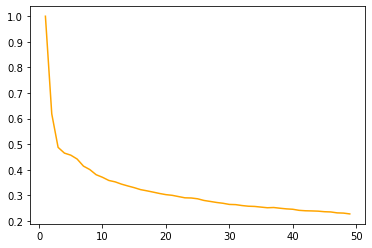

In [71]:
# For an optimal value of K for KNN

from sklearn import metrics
v=[]




k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X, y)
    k_pred = knn.predict(X)
    v.append( metrics.accuracy_score(y, k_pred))


import matplotlib.pyplot as plt
plt.plot(k_range,v,c='Orange',)
plt.show()

In [72]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

logreg.predict([[3, 5, 4, 2, 6]]) # Col vector # See previous result


y_pred = logreg.predict(X)

print(y_pred)

[69 74 68 ... 34 11 11]


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
#1 KNN ACCURACY
from sklearn import metrics
print(metrics.accuracy_score(y, kypred))


0.4574


In [74]:
#2
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.0967


In [75]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print(X_train.shape)
print(y_train.shape)

(6000, 5)
(6000,)


In [76]:
logres = LogisticRegression()
logres.fit(X_train,y_train) # train data


# predict from test
log_pred = logres.predict(X_test)

# check accuracy
import sklearn.metrics as mt
mt.accuracy_score(log_pred,y_test)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.08075

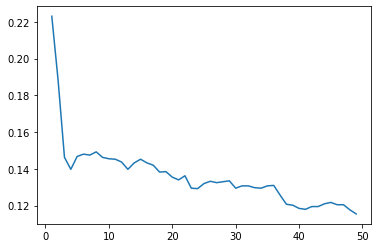

In [77]:
from sklearn import metrics
v=[]


k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X_train, y_train)
    k_pred = knn.predict(X_test)
    v.append( metrics.accuracy_score(y_test, k_pred))



import matplotlib.pyplot as plt
plt.plot(k_range,v)

plt.show()

In [78]:
knn = KNeighborsClassifier(n_neighbors=12)
# fit the model with data
knn.fit(X_train, y_train)
k_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, k_pred)

0.14375